In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import uniform
import seaborn as sns
import statsmodels.graphics.gofplots as sm
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as sp
import pandas as pd
import math
import sklearn as skl
import random as rand
import time
import matplotlib.pyplot as plt
import statistics as stats
import pymc3 as pm
import warnings
import arviz as az
import theano.tensor as tt
warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.2
Running on ArviZ v0.11.2


# Reflection
I personally am Frequentist. This of course colors my analysis of Bayes, but to my knowledge no Frequentist outright denies or rejects Bayes. It is simply that we reject the use of Bayes for EVERYTHING. There is a feeling that Bayes is more subjective than Frequentist assumptions, involving priors and such. This is not a valid argument for Frequentist statistics, as Frequentists also make big assumption like normality of the population etc. However, there is a rather powerful feeling that Frequentist statistics have a greater objectivity in their assumptions.

My real objection to Bayes is that sometimes it is wrong. Bayesian logic in life is not always sufficient. Relying on Bayes is not bad outright, but adhering to it so closely has led to horrors committed upon society: colorism, racism, sexism, homophobia, etc. And these societal problems leave long traces and terrible data that can be used to further justify their horrible assumptions, because the **prior beliefs** held by those who maintain these assumptions will oftentimes never, or through a very difficult battle, obtain a belief that doesn't result in oppression or furthering these systematic problems. Furthermore, Frequentist statistics is simpler for quick setup compared to Bayes, and Frequentists have devised powerful robust and nonparametric tests. 

The fact that Bayes has led to terrible wrongs, should point us to its practical flaws, and thus while Frequentism doesn't release us from the shackles of subjectivity and human error, Frequentist statistics have a good place for statistical practice in certain places over Bayes when used appropriately. True, Frequentist does not fix these errors, but they can be agreed upon, and in Fisherian analysis, we can at least say we don't know sometimes, rather than we know.

# Explanation of the Bayesian Framework
Mostly drawn from this link https://www.nature.com/articles/s43586-020-00001-2

## Assumptions
The big assumption of Bayesian statistics is that they treat the unknown quantity they wish to estimate as a random variable itself. This brings frequentists and Bayesians to blows as frequentists believe the unknown quantity is fixed, and that as time goes on, it converges towards a certain frequency.

## Terms
Bayesians don't stop here of course, they hurt frequentists further by introducing priors, beliefs, posteriors and all the like. They inject in subjectivity to their work. Here, I am less willing to argue with them. Remember, in frequentist statistics, we make assumptions too, of approximate normality in the population distribution, etc. The argument would then devolve into whoever's assumptions and subjectivity is more wrong, which is a horrible argument to have, so for civility, I would say this is fine. I do believe that in general, intuition on normality on the population distribution is usual, but the inclusion of beliefs and working with them is reasonable for Bayes.

### Belief Distribution
This is your current distribution of whatever you're trying to work with. It is termed belief since now you don't think there's a fixed quantity to be found, but this means you can adapt your belief. You will basically update the belief with Bayes Theorem.

### Prior Distribution
This is the subjective belief distribution towards parameters before you use your data. This is the main stickler of frequentists and Bayesians, as frequentists argue this is way too subjective. Furthermore, bad priors can result in terrible performance. Lastly, priors are hard to obtain. Very hard. Super duper ultra hard, which IS a good reason to use frequentist statistics. Methods such as empirical Bayes can estimate a possibly more correct prior. Some will just choose a reasonable or subjectively believed prior

### Likelihood Distribution
This is the distribution of the quantity you're looking for conditioned on the parameters.

### Posterior Distribution 
This distribution is the updated prior using the collected data, it is usually more accurate. 

## Workflow
The typical Bayesian workflow consists of
three main steps: 
1. Capturing available knowledge about a given parameter in a statistical model via the prior distribution, which is typically determined before data collection; 
2. Determining the likelihood function using the information about the parameters available in the observed data; 
3. Combining both the prior distribution and the likelihood function using Bayes’ theorem in the form of the posterior distribution

(From the article: Bayesian statistics and modelling Schoot, Depaoli, King, et al.)
### Finding Priors
Priors can come in many forms, but they have different levels of informativeness:
1. Informative
2. weakly informative
3. diffuse
Priors can range anywhere from complete to totally nonexistent certainty

Prior elicitation is the method by which priors can be found and constructed

Diffuse priors can have an adverse
impact on parameter estimates via the posterior when
sample sizes are small, especially in complex modelling
situations involving meta-analytic models46, logistic
regression models44 or mixture models47. In addition,
improper priors are sometimes used with the intention of
using them as diffuse priors. Although improper priors
are common and can be implemented with relative ease
within various Bayesian programs, it is important to note
that improper priors can lead to improper posteriors. We
mention this caveat here because obtaining an improper
posterior can impact the degree to which results can be
substantively interpreted. Overall, we note that a diffuse
prior can be used as a placeholder before analyses of
the same or subsequent data are conducted with more
informative priors.

 Overall, there is no right or wrong
prior setting. Many times, diffuse priors can produce
results that are aligned with the likelihood, whereas
sometimes inaccurate or biased results can be obtained
with relatively flat priors47. Likewise, an informative
prior that does not overlap well with the likelihood can
shift the posterior away from the likelihood, indicating that inferences will be aligned more with the prior
than the likelihood. Regardless of the informativeness
of the prior, it is always important to conduct a prior
sensitivity analysis to fully understand the influence
that the prior settings have on posterior estimates48,49.
When the sample size is small, Bayesian estimation
with mildly informative priors is often used but the prior specification might have a huge effect on the
posterior results.

When priors do not conform with the likelihood, this
is not necessarily evidence that the prior is not appropriate. It may be that the likelihood is at fault owing to
a mis-specified model or biased data. The difference
between the prior and the likelihood may also be reflective of variation that is not captured by the prior or likelihood alone. These issues can be identified through a
sensitivity analysis of the likelihood, by examining different forms of the model, for example, to assess how the
priors and the likelihood align

Because inference based on a Bayesian analysis is subject
to the ‘correctness’ of the prior, it is of importance to carefully check whether the specified model can be considered
to be generating the actual data. This is partly done
by means of a process known as prior predictive checking.

Even in the
case of a valid prior elicitation procedure, it is extremely
important to understand the exact probabilistic specification of the priors. This is especially true for complex
models with smaller sample sizes9
. Because smaller sample sizes usually convey less information, priors, in comparison, will exhibit a strong influence on the posteriors.
Prior predictive checking is an exercise to improve the
understanding of the implications of the specified priors
on possible observations. It is not a method for changing
the original prior, unless this prior explicitly generates
incorrect data.

The prior predictive distribution is a distribution of all possible samples that could
occur if the model is true. In theory, a ‘correct’ prior
provides a prior predictive distribution similar to the
true data-generating distribution54. Prior predictive
checking compares the observed data, or statistics of the
observed data, with the prior predictive distribution, or
statistics of the predictive distribution, and checks their
compatibility. For instance, values are drawn from
the prior distributions. Using kernel density estimation,
a non-parametric smoothing approach used to approximate a probability density function, the original sample and the samples from the predictive distribution
can be compared. Alternatively, the compatibility can
be summarized by a prior predictive p-value, describing
how far the characteristics of the observed data lie in
the tails of the reference prior predictive distribution

Young and Pettit argued that measures based on
the tail area of the prior predictive distribution, such
as the approaches of Box and Evans and Moshonov, do
not favour the more precise prior in cases where two
priors are both specified at the correct value. Instead,
they propose using a Bayes factor to compare two priors. The Bayes factor would favour the more precise
prior. These three approaches leave the determination
of prior–data conflict subjective, depending on an arbitrary cut-off value. The data agreement criterion tries
to resolve the prior–data conflict determination issue by
introducing a clear classification, removing the subjective element of this decision66. This is done at the expense
of selecting an arbitrary divergence-based criterion

An alternative criterion has been developed that computes whether the distance between the prior and the
data is unexpected. For a comparison of both criteria, we
direct the reader to Lek and van de Schoot


#### Standard Bayesian Methods
They set the prior before data collection. One way is expert consultation to find the hyperparameters, consulting either one or a number of experts. Using previous publications or meta-analyses can also work, or some combination thereof. 

#### Empirical Bayesian Methods
They set the prior after data collection, estimating it from the collected data itself. These can lead to double-dipping/circular analysis. Maximum likelihood or use of sample statistics can do the job. It usually involves employing some evolving estimation of the prior that will be updated.

### Finding Likelihood
In both inference paradigms, its role is to
quantify the strength of support the observed data lends
to possible value(s) for the unknown parameter(s).

In some cases, specifying a likelihood function can
be very straightforward. However, in practice, the
underlying data-generating model is not always known.
Researchers often naively choose a certain data-generating
model out of habit or because they cannot easily change
it in the software. Although based on background
knowledge, the choice of the statistical data-generating
model is subjective and should therefore be well understood, clearly documented and available to the reader.
Robustness checks should be performed on the selected
likelihood function to verify its influence on the posterior
estimates. Although most research on Bayesian robustness focuses on the sensitivity of the posterior results to
the specification of the prior, a few contributions have
focused on the sensitivity of the posterior results to the
specification of the likelihood function


### What happens after the Posterior?
After specifying the prior and the likelihood, and collecting the data, the posterior distribution can be obtained.
Here, we explain how a model can be fitted to data to
obtain a posterior distribution, how to select variables
and why posterior predictive checking is needed. Model
building is an iterative process; any Bayesian model can
be viewed as a placeholder that can be improved in
response to new data or lack of fit to existing data, or
simply through a process of model refinement

(essentially, the posterior distribution is the sampling distribution for Bayesians)

#### Model Fitting
Within the
Bayesian framework for model fitting, probabilities are
assigned to the model parameters, describing the associated uncertainties. In Bayesian statistics, the focus is
on estimating the entire posterior distribution of the
model parameters. This posterior distribution is often
summarized with associated point estimates, such as the
posterior mean or median, and a credible interval. Direct
inference on the posterior distribution is typically not
possible, as the mathematical equation describing the
posterior distribution is usually both very complicated
and high-dimensional, with the number of dimensions
equal to the number of parameters. The expression
for the posterior distribution is typically only known
up to a constant of proportionality, a constant term in
the posterior distribution that is not a function of the
parameters and, in general, cannot be explicitly calculated. In particular, the denominator of the expression
for the posterior distribution is a function of only the
data, where this function is not available in closed form
but expressible only as an analytically intractable integral. This means that we cannot evaluate the posterior
distribution exactly, and so cannot calculate, for example, associated summary statistics of interest directly.
Further, the high dimensionality exacerbates these problems, so that calculating the marginal posterior distribution
may also not be tractable, and expressible only in integral
form. **We note that this intractability of the posterior distribution was the primary practical reason why Bayesian
statistics was discarded by many scientists in favour of
frequentist statistics.**

The seminal article by Gelfand and Smith described how Markov chain Monte Carlo
(MCMC), a technique for sampling from a probability
distribution, can be used to fit models to data within
the Bayesian paradigm. In particular, the MCMC algorithm only requires the probability distribution of interest to be specified up to a constant of proportionality and
is scalable to high dimensions.

MCMC is able to indirectly
obtain inference on the posterior distribution using
computer simulations

Here, we focus on MCMC for posterior inference.
MCMC combines two concepts: obtaining a set of
parameter values from the posterior distribution using
the Markov chain; and obtaining a distributional estimate
of the posterior and associated statistics with sampled
parameters using Monte Carlo integration. Although
MCMC is the most common class of algorithm used
in Bayesian analyses, there are other model-fitting
algorithms. Other available estimators can be
found elsewhere

Metropolis-Hastings is of course useful, Hamiltonian Monte Carlo, Gibbs sampler, Particle MCMC, Evolutionary Monte Carlo

The Gibbs sampler, the
Metropolis–Hastings algorithm and Hamiltonian
Monte Carlo are standard approaches for defining the
transition kernel so that the corresponding stationary
distribution is the correct posterior distribution. (MCMC is based on building the correct posterior as the resulting stationary distribution)

#### Assessments
Trace plots and R statistic are the standard ways of evaluating the MCMC method. The big debate over MCMC is the issue of convergence. 

PyMC3 is a Bayesian probability library for Python

Once a posterior distribution for a particular model
is obtained, it can be used to simulate new data conditional on this distribution that might be helpful to
assess whether the model provides valid predictions so
that these can be used for extrapolating to future events.
Those simulations can be used for several purposes.
They can be used to check whether the simulated data
from the model resemble the observed data by comparing kernel density estimates of the observed data with
density estimates for the simulated data57. A more formal
posterior predictive checking approach can be taken to
evaluate whether the model can be considered a good
fit with the data-generating mechanism

#### Variational Bayes
An alternative approach
is to produce functional approximations of the posterior using techniques including variational inference or
expectation propagation. Here, we describe variational
inference, also known as variational methods or variational Bayes, owing to its popularity and prevalence of
use in machine learning.

Variational inference begins by constructing an
approximating distribution to estimate the desired —
but intractable — posterior distribution. Typically, the
approximating distribution chosen is from a family of
standard probability distributions, for example multivariate normal distributions, and further assumes that some
of the dependencies between the variables in our model
are broken to make subsequent computations tractable. 

The approximating distribution will be specified up to a set of variational parameters
that we optimize to find the best posterior approximation
by minimizing the Kullback–Leibler divergence from the
true posterior. As a consequence, variational inference
reframes Bayesian inference problems as optimization
problems rather than as sampling problems, allowing them to be solved using numerical optimization.
When combined with subsampling-based optimization
techniques such as stochastic gradient descent, variational inference makes approximate Bayesian inference
possible for complex large-scale problems

# Practical Bayesian Statistics
Bayesian statistics hinges on taking a prior and a posterior and combining them to obtain a posterior. But there are difficulties, and I will try to motivate why the current approaches are used. 
Say we have parameters theta, and data D. The likelihood is P(D | theta) and prior is P(theta). Bayes theorem says

P(theta | D) = P(D | theta) P(theta) / P(D)

Another form would be 
P(theta | D) = P(D | theta) P(theta) / integral{P(D | theta)P(theta)}dtheta

The numerator is computable (these are just plug in values for your known functions), but the denominator is oftentimes not. This is due to it being nearly impossible to find a closed form solution to the bottom integral, especially when multiplying together insane functions with betas and gammas and Gaussians floating around in there. Like, how do we accurately integrate a gamma and gaussian multiplied together? Furthermore, this enormous integral across your probability space is enormous and susceptible to numerical errors, and given that it's a denominator, that's pretty big influence on probability for values between 0 and 1. 

So now you think, well, maybe if we approximate our denominator well, and sample it to acquire a decent integral, but this will also not work, as sampling requires inverting the complicated function that we can't even figure out how to integrate.

We're so close, we know the general shape of our posterior distribution, we are just off by a constant factor. As it turns out, you can sidestep this issue, by sampling from the posterior distribution directly, using Markov Chain Monte Carlo sampling methods. These methods work if you know your distribution up to a constant, and give a stationary distribution that is the same as the posterior distribution, after you construct a Markov Chain to do the sampling. The algorithm is simple, but you have to tweak a few things. The problem is that, like with most tuning, you just have to fiddle around, no solution out there to do it automatically for you. Anyways, you tweak the initial guesses and a transition distribution (this choice helps the Markov Chain decide where to go) and after a while it should converge close to the actual posterior. You need to discard a certain amount (called the burn-in samples) of initial samples as they were likely wrong, but then you will be left with a huge number of samples that you can use to approximate your posterior distribution. Then fit a curve or something and start applying all your statistic inference methods, this posterior distribution is the sampling distribution now.

The reason we only need a proposal distribution proportional to the actual one is because we are working with probabilities! Since all probability distributions have a total area of 1 under their curve, the Markov Chain constructed can obtain the unique proposal distribution with only a proposal distribution, as the algorithm relies on dividing them using detailed balance, thus eliminating the need to know total area. This is a really beautiful proof:

https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm

Working with integrals is always difficult, but having the MCMC methods are able to revitalize our ability to take integrals (allowing us to take expectations in probability). We can approximate functions by sampling them, and MCMC does exactly that. Importance sampling in Monte Carlo integration gives us the ability to efficiently calculate functions now.

The quadrature estimator:

Q_N = 1/N * sum(f(x_i) / p(x_i)),

where f is our desired function to integrate is the typical Monte Carlo integration estimator. Now when we are dealing with expectations, for E(g(x)), we have the integral integral(g(x)P(x)) to deal with. If we set p(x) = P(x) / nu, then our Monte Carlo estimator becomes

1/N * sum(g(x_i))

when we sample x_i according to p(x). Thus for a mean, do Metropolis Hastings on P(x) and then sum up the sample x-value and divide by their total number. It's a beautiful method.

In practice, the NUTS sampler (No U-turn sampler) is the standard.

From the samples, we can do a lot. At about 1000 sometimes even higher at like 5000 samples, we can form an approximate CDF with the empirical CDF that's usually very good. We can use this to determine credibility intervals and hypothesis testing. To obtain MAP, we can simply take our mode from the sample, or if we want mean, we take the sample mean.

In [3]:
rand.seed(1623362164)
# the pop and prior are from the Everyday Statistics Notebook
pop = [48.5, 49.5, 49.6, 49.8, 49.8, 49.8, 49.9, 50.0, 50.0, 50.1, 50.1, 50.2, 50.2, 50.2, 50.3, 50.4, 50.6, 50.6, 50.6, 51.4, 51.5, 54.4, 54.5, 54.6, 55.4, 56.1, 57.0, 57.0, 57.0, 57.0, 57.1, 57.2, 57.2, 57.3, 57.3, 57.4, 57.6, 57.8, 57.8, 57.9, 57.9, 57.9, 58.0, 58.0, 58.0, 58.0, 58.1, 58.1, 58.1, 58.2, 58.2, 58.3, 58.3, 58.4, 58.5, 58.5, 58.6, 58.6, 58.7, 58.7, 58.7, 58.7, 58.7, 58.8, 58.8, 58.8, 58.9, 58.9, 58.9, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.1, 59.1, 59.1, 59.2, 59.2, 59.3, 59.3, 59.3, 59.3, 59.4, 59.4, 59.4, 59.4, 59.4, 59.4, 59.4, 59.5, 59.5, 59.5, 59.5, 59.5, 59.6, 59.6, 59.6, 59.6, 59.7, 59.7, 59.8, 59.8, 59.8, 59.9, 59.9, 59.9, 59.9, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.1, 60.1, 60.1, 60.1, 60.1, 60.2, 60.2, 60.2, 60.3, 60.3, 60.3, 60.3, 60.3, 60.3, 60.3, 60.4, 60.4, 60.4, 60.4, 60.4, 60.4, 60.4, 60.4, 60.5, 60.5, 60.5, 60.5, 60.5, 60.5, 60.6, 60.6, 60.6, 60.6, 60.6, 60.7, 60.7, 60.7, 60.7, 60.7, 60.7, 60.7, 60.8, 60.8, 60.8, 60.8, 60.8, 60.9, 60.9, 60.9, 60.9, 60.9, 61.0, 61.0, 61.0, 61.0, 61.0, 61.1, 61.1, 61.1, 61.1, 61.1, 61.1, 61.1, 61.1, 61.1, 61.1, 61.2, 61.2, 61.2, 61.2, 61.3, 61.3, 61.3, 61.3, 61.3, 61.3, 61.4, 61.4, 61.4, 61.4, 61.4, 61.4, 61.4, 61.5, 61.5, 61.6, 61.6, 61.6, 61.6, 61.6, 61.6, 61.6, 61.6, 61.7, 61.7, 61.7, 61.7, 61.7, 61.7, 61.7, 61.7, 61.7, 61.8, 61.8, 61.8, 61.8, 61.8, 61.8, 61.8, 61.8, 61.8, 61.9, 61.9, 61.9, 61.9, 61.9, 61.9, 61.9, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.2, 62.2, 62.2, 62.2, 62.3, 62.3, 62.3, 62.3, 62.3, 62.3, 62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.6, 62.6, 62.6, 62.6, 62.6, 62.6, 62.6, 62.6, 62.6, 62.7, 62.7, 62.7, 62.7, 62.7, 62.7, 62.7, 62.7, 62.8, 62.8, 62.8, 62.8, 62.8, 62.8, 62.8, 62.8, 62.9, 62.9, 62.9, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.2, 63.2, 63.2, 63.2, 63.2, 63.2, 63.2, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.3, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.4, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.7, 63.7, 63.7, 63.7, 63.7, 63.7, 63.7, 63.7, 63.7, 63.7, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.9, 63.9, 63.9, 63.9, 63.9, 63.9, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.1, 64.1, 64.1, 64.1, 64.1, 64.2, 64.2, 64.2, 64.2, 64.2, 64.2, 64.3, 64.3, 64.3, 64.3, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.6, 64.6, 64.6, 64.6, 64.6, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.7, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.9, 64.9, 64.9, 64.9, 64.9, 64.9, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.2, 65.2, 65.2, 65.2, 65.2, 65.2, 65.2, 65.3, 65.3, 65.3, 65.4, 65.5, 65.5, 65.5, 65.5, 65.5, 65.5, 65.5, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.7, 65.7, 65.7, 65.8, 65.8, 65.8, 65.8, 65.9, 65.9, 65.9, 65.9, 66.0, 66.0, 66.0, 66.1, 66.1, 66.2, 66.2, 66.2, 66.2, 66.2, 66.3, 66.3, 66.3, 66.3, 66.3, 66.4, 66.4, 66.4, 66.4, 66.5, 66.5, 66.6, 66.6, 66.6, 66.6, 66.6, 66.6, 66.6, 66.7, 66.7, 66.8, 66.8, 66.8, 66.8, 66.8, 66.8, 66.8, 66.9, 66.9, 67.0, 67.0, 67.0, 67.0, 67.0, 67.1, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.3, 67.4, 67.5, 67.5, 67.5, 67.5, 67.6, 67.6, 67.6, 67.6, 67.6, 67.6, 67.7, 67.9, 68.0, 68.0, 68.1, 68.2, 68.2, 68.2, 68.2, 68.3, 68.3, 68.5, 68.6, 68.8, 68.8, 68.8, 68.8, 68.9, 69.1, 69.2, 69.4, 69.4, 69.6, 69.7, 70.0, 70.1, 70.5, 71.3, 71.6, 71.6, 71.7, 71.8, 71.8, 72.1, 72.2, 72.2, 72.2, 72.3]
data = [60.8, 62.8, 57.0, 62.1, 63.4, 57.8, 61.0, 49.8, 60.3, 68.1, 65.6, 65.6, 57.2, 62.3, 63.3]
#mu = round(stats.mean(pop), 2) pop mean: 62.68
#sigma = round(stats.pstdev(pop), 2) sigma: 3.79
#print(mu, sigma)
# We only work with one parameter: mean

In [4]:
with pm.Model() as model:
    # this is the prior
    mu = pm.Normal("mu", mu=55.0, sigma=3.79 / 1.2)
    obs = pm.Normal("obs", mu=mu, sigma=3.79, observed=data)
    idata = pm.sample(5000, tune=1500, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]


Sampling 2 chains for 1_500 tune and 5_000 draw iterations (3_000 + 10_000 draws total) took 18 seconds.


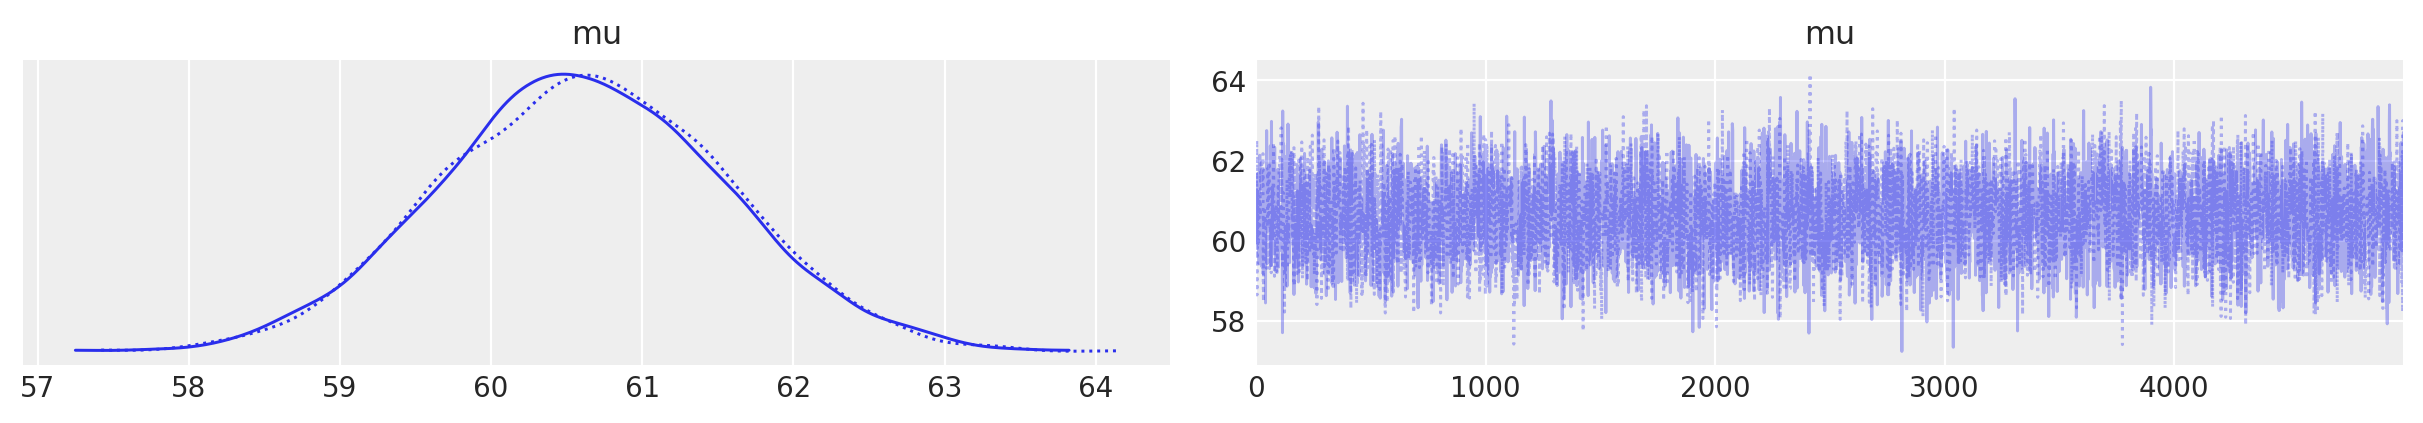

In [5]:
az.plot_trace(idata);

In [6]:
# Bayes Estimation
posterior = np.asarray(idata.posterior["mu"].sel(chain=1)[:])
posterior.sort()
N = len(posterior)
ecdf = ECDF(posterior)

In [7]:
def inv_ecdf(x):
    assert x >= 0 and x <= 1
    n = math.ceil(x * N)
    return posterior[n]

In [8]:
# Bayesian estimators are usually either the MAP (takes the mode of posterior) or the MMSE (takes mean of posterior)
map_mean = stats.mode(posterior)
mmse_mean = stats.mean(posterior)
s = stats.stdev(posterior)
print(map_mean, mmse_mean, s)

59.84652806152165 60.626427899496534 0.9337541795738237


In [9]:
# We take credibility intervals, and this time, it really is 95% possible that we have the mean in the interval.
alpha = 0.05
# Solve for c in CDF(theta + c) - CDF(theta - c) = 1 - alpha
# Ideally, you interpolate and solve, but here we will be lazy and assume it's Gaussian.
c_low = norm.ppf(alpha/2, mmse_mean, s)
c_high = norm.ppf(1 - alpha /2, mmse_mean, s)
print(c_low, c_high)
# And we are wrong lol. Priors are a curse and a blessing. If you ran another sample, it would no doubt improve
# the credibility interval substantially

58.79630333711809 62.45655246187498


In [11]:
# Say we're doing Bayesian hypothesis testing. There's 3 tests, Bayes Factor, MAP and Minimum Cost. 
# Bayes factor seems to be the standard
# P(H_0 | D)*P(H_1) / (P(H_1 | D) * P(H_0)) is the factor. If greater than 1, accept H_0, otherwise accept H_1.
# Actually, the further the factor from one on a log scale shows the decisiveness of evidence.
P_h1 = norm.pdf(62.68, 55.0, 3.79/1.2)
P_h0 = norm.pdf(55.0, 55.0, 3.79/1.2)
P_h0D = norm.pdf(55.0, mmse_mean, s)
P_h1D = norm.pdf(62.68, mmse_mean, s)
print(P_h0D * P_h1 / (P_h1D * P_h0))
# we see that this is heavily in favor for the H_1
# There's also MAP, which is just bigger posterior:
print(P_h0D / P_h1D)
# this is consistent.
# Lastly, there's minimum cost, where you weight the hypotheses:
# P(H_0 | D) * Cost of H1 when H0 true / (P(H_1 / D) * Cost of H0 when H1 true).
# You'd manually choose the weights, and this is good for things where there
# are stakes to getting a hypothesis wrong, like surveillance systems. No example
# here as such a test is unecessary with heights.

7.623512137139956e-09
1.4660294375737293e-07


In [ ]:
# Bayes hierarchical Models
# Bayes can also do regression, but this is complex. You essentially used priors to estimate the coefficients in your 
# model. Doing significance testing and such on those coefficients is something else, but it is intuitively the same as 
# above. You use your given dependent values as data to get your parameters.
# Bayes Hierarchical models are proven to be robust.